## DevCon 2018 - Deep Learning


###  Enterprise Use Cases

[Use Case 1]

[Use Case 2]

[Use Case 3]

[Use Case 4]

### ML background

Machine learning problems can be broadly classified into three paradigms.
 - unsupervised learning
 - supervised learning
 - reinforcement learning


### Learning paradigms

Unsupervised learning primarily deals with discovery of patterns within data. For example, clustering algorithms try to group your data based on some distance metric (say Euclidean distance). 
e.g: $k$-means clustering, fuzzy $c$-means clustering

Reinforcement learning deals with teaching AI agents what to do in an environment. Agents must learn the optimal action through repeated interactions with the environment. This is an active area of interest currently. Check out [open AI gym](https://gym.openai.com/docs/)

Supervised learning is learning from examples provided by a knowledgeable source. In practice, supervision is provided in the form of labels for your data.

### Supervised learning

Supervised learning methods are characterized by learning approaches/models. Models could be non-parametric (like $k$NN) or parametric. Parametric models are called so, since they model the expectation of the response variable when conditioned on the input as a parametric function.

i.e.

\begin{align*}
E[Y|X=x] &= \text{some parameterized function}
\end{align*}

The simplest parametric models impose a parameterized linear function on the condtional expectation, e.g. regression
In linear regression,
\begin{align*}
E[Y|X=x] = ax + b
\end{align*}

Non-linear models can overcome the limitations faced by linear models. Neural nets are non-linear statistical models for function approximation.

There is more to the parametric vs. non-parametric discussion than the simple definition provided here. Read this [link](http://mlss.tuebingen.mpg.de/2015/slides/ghahramani/gp-neural-nets15.pdf) for more information.

## Neural nets
Neural networks are non-linear statistical models for function approximation.

They have been around for a long time, since the 1940s.

Read these articles for a brief history.

[part1](http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning/)
[part2](http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning-part-2)
[part3](http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning-part-3)
[part4](http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning-part-4)

The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) states that a simple neural net with a single layer of finite neurons can approximate a wide variety of functions.

### Single layer Neural Net

A simple neural network with one hidden layer would look like this.

In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle
from bokeh.models.graphs import NodesAndLinkedEdges, EdgesAndLinkedNodes

num_input = 4
num_hidden = 4
num_output = 1
N = num_input + num_hidden + num_output

node_indices = list(range(N))

plot = figure(title='Neural net with one hidden layer', x_range=(-1,5), y_range=(-1,5))

# graph construction
graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')

# royal blue - #4169E1, darkcyan - #008B8B, orange - #FFA500
colors = ['#4169e1'] * num_input + ['#008b8b'] * num_hidden + ['#ffa500'] * num_output
graph.node_renderer.data_source.add(colors, 'color')
graph.node_renderer.glyph = Circle(size=20, fill_color='color')

input_indices = range(num_input)
hidden_indices = range(num_input, num_input + num_hidden)
edges_input_to_hidden = [(inp, h) for inp in input_indices for h in hidden_indices]

output_indices = range(num_input + num_hidden, N)
edges_hidden_to_output = [(h, o) for h in hidden_indices for o in output_indices]

edges = edges_input_to_hidden + edges_hidden_to_output
start = [x for x, _ in edges]
end = [y for _, y in edges]

graph.edge_renderer.data_source.data = dict(
    start=start,
    end=end)

### start of layout code
input_layer_y = np.arange(num_input)
input_layer_x = np.ones(len(input_layer_y))
hidden_layer_y = np.arange(num_hidden)
hidden_layer_x = 2 * np.ones(len(hidden_layer_y))
output_layer_y = (np.arange(num_output) + max(num_input, num_hidden) - 1) / 2
output_layer_x = 3 * np.ones(len(output_layer_y))

node_x = np.concatenate([input_layer_x, hidden_layer_x, output_layer_x])
node_y = np.concatenate([input_layer_y, hidden_layer_y, output_layer_y])

graph_layout = dict(zip(node_indices, zip(node_x, node_y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

# add selection, and hover glyphs to edge renderers
# graph.edge_renderer.selection_policy = NodesAndLinkedEdges()
# graph.edge_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph)

In [3]:
show(plot)

The blue layer is the input layer, the inputs simply pass through these nodes. The green layer is the hidden layer. The inputs after passing through the input layer are weighted by a parameter before being passed to the nodes in the hidden layer. The hidden layer aggregates them using a summation and passes the result through a nonlinear function. The process is repeated at all layers that come after the input layer.

For example, in this case, the output of the top neuron in the hidden layer can be written down mathematically as
$$
x_{h1} = \phi(w_1^T x + b_1) \\
x \text{ is the input vector}
$$

Similarly,
$$
x_{h2} = \phi(w_2^T x + b_2) \\
x_{h3} = \phi(w_3^T x + b_3) \\
x_{h4} = \phi(w_4^T x + b_4)
$$

The outputs of the intermediate layer can be aggregated into a single vector as
$$
x_h = \begin{bmatrix}
x_{h1} \\
x_{h2} \\
x_{h3} \\
x_{h4}
\end{bmatrix}
$$

The response of the output layer can then be written as 
$$
x_o = \psi(w_o^T x_h + b_o)
$$

*NOTE* - The choice of activation functions can vary from layer to layer, we will cover some common activation functions later in this notebook.

## Why go deep ?

Although the universal approximation theorem states that a neural net with a single hidden layer is enough, such an architecture may not be computationally tractable. For example, the number of neurons in that single layer might exceed the total number of atoms in the universe or the neural net might take until the end of the universe to converge. We overcome this limitation by going deeper.

Going deep allows you to model more complexity while keeping your parameters from growing at an exponential pace.

Deep learning has become computationally feasible with the advent of modern computing power.

### Math Background

#### Non-linearity

[Wolfram Mathematica - Linear Functions](http://mathworld.wolfram.com/LinearFunction.html)
 
 A linear function is a function $f:\mathbb{R} \rightarrow \mathbb{R}$ which satisfies

\begin{align*}
f(x+y)=f(x)+f(y)
\end{align*}

and

\begin{align*}
f(\alpha x) &= \alpha f(x) \\
   \forall\  &x, y \in \mathbb{R}, \alpha \in \mathbb{R}. 
\end{align*}

Any function that does not exhibit linearity is a non-linear function. We typically deal with continuous differentiable **non-linear** functions in deep learning.

We will take a closer look at a few examples of common non-linear functions.

### ReLU
The simplest non-linear function is ReLU (rectified linear unit)

\begin{align*}
f(x) &=  \begin{cases}
x & x \geq 0 \\
0 & \text{otherwise}
\end{cases}
\end{align*}

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10, 10, 0.001)

def relu(scalar):
    """
    Rectified Linear Unit (ReLU)
    """
    return scalar if scalar > 0 else 0

y = np.array([relu(i) for i in x])

In [5]:
from bokeh.plotting import figure
from bokeh.io import show

plot = figure(title='ReLU', x_range=(-10,10), y_range=(-1,10))
plot.line(x,y)
pass

In [6]:
show(plot)

### Sigmoid / logistic

This is one of the most used activation functions in deep learning (especially in the output layers).

\begin{align*}
f(x) &= \frac{1} {1 + \exp(-x)}
\end{align*}

In [7]:
x = np.arange(-10, 10, 0.001)

def sigmoid(scalar):
    """
    Rectified Linear Unit (ReLU)
    """
    return 1 / (1 + np.exp(-scalar))

y = np.array([sigmoid(i) for i in x])
sns.set_style("darkgrid")

In [8]:
from bokeh.plotting import figure
from bokeh.io import show

plot = figure(title='Logistic', x_range=(-10,10), y_range=(-0.5,1.5))
plot.line(x,y)
pass

In [9]:
show(plot)

#### Loss functions

In ML problems, we evaluate the performance of our model using a [metric](http://mathworld.wolfram.com/Metric.html)/loss function. We will look at some commonly used loss functions.

##### Cross-entropy

A function that closely approximates classification error.

\begin{align*}
K &- \text{number of classes} \\
n &- \text{number of data points} \\
X &- \text{matrix of data points indexed row wise} \\
y_{ik} &- \text{response of the } k^{th} \text{output node to } i^{th} \text{input} \\
CE(X) &= - \sum_{i=1}^{n} \sum_{k=1}^K y_{ik} \log f_k(x_i)
\end{align*}


##### $\mathcal{l}2$ loss

Typically used when the response variable is continuous, e.g. linear regression

\begin{align*}
L(X) &= \sum_{i=1}^{n} (y - f(x))^2
\end{align*}

#### Convex optimization

The choice of loss function greatly influences our solution to the problem. Deep learning problems are posed as minimization of carefully chosen loss functions. It is very important that you pick differentiable continuous convex functions. Non-convex optimization problems are NP-hard.

We tackle convex optimization problems using gradient descent (or its variants). The main idea behind gradient descent to traverse along the opposite direction of the parameter gradient until you hit a minima (which is hopefully global or good enough).

## Concept illustration

We use the math we learnt so far in order to solve a linear regression problem. We do this by posing linear regression as a convex optimization problem where the objective is to minimize $l2$ loss.

In [10]:
# y = 3 x + 5, a = 3, b = 5
x = np.random.uniform(0, 100, size=100)
noise = np.random.normal(0, 15, size=100)

y = 3 * x + 5 + noise

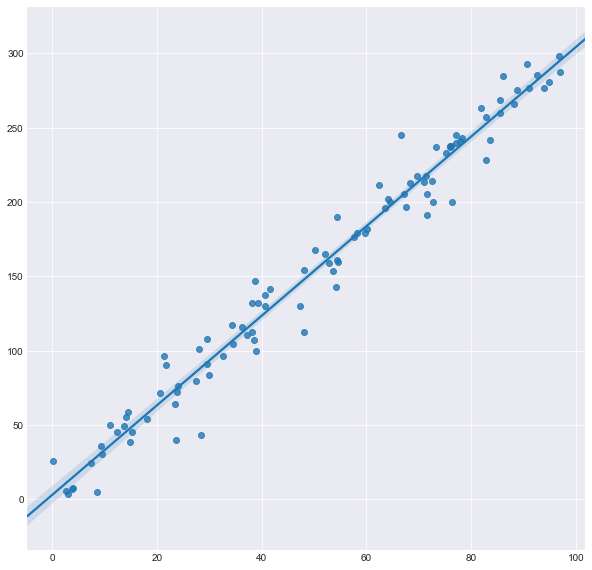

In [11]:
fig = plt.figure(figsize=(10, 10))
sns.regplot(x,y, ax=fig.gca())

#### Problem formulation (contd.)

We will formulate the problem as a convex optimization problem, and minimize the error using a gradient descent approach.

We will try to minimize the following error/loss/objective function,

\begin{align*}
E(a,b) &= \frac{1}{2N} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
       &= \frac{1}{2N} \sum_{i=1}^{n} (y_i - ax_i - b )^2 \\
       &= \frac{1}{2N} \sum_{i=1}^{n} y_i^2 + a^2 x_i^2 + b^2 + 2ax_ib - 2ax_iy_i - 2y_ib
\end{align*}

#### Gradient descent

Next, we need to compute the partial derivative w.r.t the parameters `a` and `b`.

\begin{align*}
G(a,b) = \nabla E(a,b) &= \begin{bmatrix}
\frac{\delta E}{\delta a} \\
\frac{\delta E}{\delta b} 
\end{bmatrix} \\
 &= \begin{bmatrix}
 \frac{1}{2N} \sum_{i=1}^{n} 2ax_i^2 + 2bx_i - 2x_iy_i \\
 \frac{1}{2N} \sum_{i=1}^{n} 2b + 2ax_i - 2y_i
 \end{bmatrix} \\
 &= \begin{bmatrix} 
 \frac{1}{2N} \sum_{i=1}^{n} 2x_i (ax_i + b - y_i) \\
 \frac{1}{2N} \sum_{i=1}^{n} 2 (ax_i + b - y_i)
 \end{bmatrix} \\
 &= \begin{bmatrix} 
 \frac{1}{2N} \sum_{i=1}^{n} 2x_i (\hat{y}_i - y_i) \\
 \frac{1}{2N} \sum_{i=1}^{n} 2 (\hat{y}_i - y_i)
 \end{bmatrix} \\
  &= \begin{bmatrix} 
 \frac{1}{N} \sum_{i=1}^{n} x_i \text{(pointwise prediction error)} \\
 \frac{1}{N} \sum_{i=1}^{n} \text{(pointwise prediction error)}
 \end{bmatrix}
\end{align*}

In [12]:
import numpy as np

def predict(x, a, b):
    """
    Function estimates the response y_hat given input data x, parameters a and b
    """
    return a*x + b

def compute_gradient(x, y, a, b):
    """
    Computes gradient in the parameter space.
    """
    predictions = predict(x, a, b)
    point_errors = predictions - y
    grad_a = np.mean(x * point_errors)
    grad_b = np.mean(point_errors)
    return [grad_a, grad_b]

In [13]:
a, b = 0.0, 0.0
learning_rate = 0.0001

def converged(grad_a, grad_b):
    """
    Checks if magnitude of gradient is less than a preset value
    """
    mag_grad = grad_a * grad_a + grad_b * grad_b
    return mag_grad <= 10e-10

grad_a, grad_b = np.inf, np.inf
num_iterations = 0

# normalize your inputs before you perform gradient descent
# or good luck getting it to converge
normalized_x = (x - np.mean(x)) / np.std(x)
normalized_y = (y - np.mean(y)) / np.std(y)

In [14]:
# DONT RUN THIS CELL REPEATEDLY, DESCENT WILL NOT CONVERGE WITH POOR SEEDS
history_a = []
history_b = []

def rescale(a,b):
    """
    Rescales the coefficients a and b back into the unscaled versions
    """
    b = np.std(y) * (b - a * np.mean(x) / np.std(x)) + np.mean(y)
    a = a * np.std(y) / np.std(x)
    return a ,b

while not converged(grad_a, grad_b) and num_iterations < 10e7:
    grad_a, grad_b = compute_gradient(normalized_x, normalized_y, a, b)
    old_a, old_b = a, b
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b
    num_iterations += 1
    
    old_a, old_b = rescale(old_a, old_b)
    history_a.append(old_a)
    history_b.append(old_b)

# rescale params to the "unnormalized" version
a, b = rescale(a, b)
history_a.append(a)
history_b.append(b)

In [15]:
print("The parameters for our linear model are a={}, b={}".format(a,b))
print("Gradient were grad_a : {}, grad_b : {}".format(grad_a, grad_b))

errors = (a * x + b) - y
print("Root mean squared error (RMSE) : ", np.sqrt(np.mean(np.power(errors, 2))))

The parameters for our linear model are a=3.013260129295445, b=2.9965664275240442
Gradient were grad_a : -3.1622021493730166e-05, grad_b : -6.661338147750939e-18
Root mean squared error (RMSE) :  14.026499755


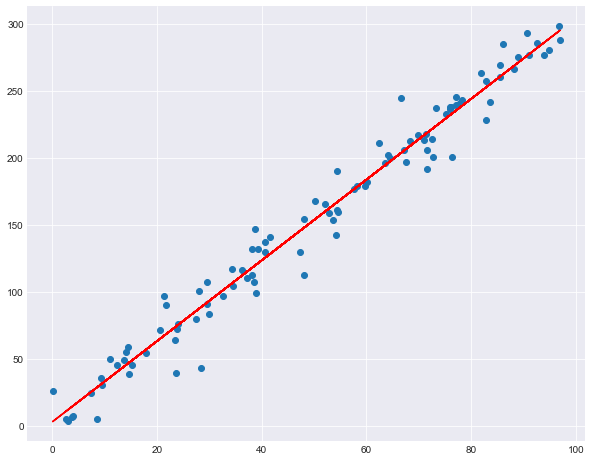

In [16]:
import matplotlib.pyplot as plt
resp_y = a * x + b
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, resp_y, color='red')
plt.show()

#### Conclusion

The manual approach to computing gradients is error prone and not easy for modern neural nets. For example, the VGG16 convnet architecture has 14 million trainable parameters (these nets are better than humans at performing large scale object recognition).

This is why we use tools like TensorFlow and Keras

### Tools
<br/>
<center>
<img src=Tensorflow_logo.svg height=200/>
<br>
<img src=keras-logo-small-2018.jpg height=200 width=100/>
</center>

#### TensorFlow

A matrix is a 2D ordered collection.
A tensor is a generalization of a matrix to `n` dimensions, i.e. a tensor is a `n` dimensional ordered collection.

TensorFlow is an API that makes it relatively easy to manipulate tensors. TensorFlow is suited for deep learning problems since it does a lot of things for the developer automatically. Models are constructed in the form of computational graphs, automatic differentiation using a subgraph makes it easier to do things like backpropagation with very little input from the developer.

TensorFlow is open-sourced by Google, the website has a lot of tutorials and documentation regarding the use of TensorFlow. For further reading and insight into the inner workings of TensorFlow, we recommend the following links.

   - [Automatic differentiation](http://www.columbia.edu/~ahd2125/post/2015/12/5)
   - [Low level intro](https://www.tensorflow.org/programmers_guide/low_level_intro)
   - [Programmer's guide](https://www.tensorflow.org/programmers_guide)

TensorFlow is aimed at building low level computational graphs (although it does have high level modules in contrib), which is why we build using Keras.

#### Keras

From the keras [website](https://keras.io),

*Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.*

*Use Keras if you need a deep learning library that*

   - *Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).*
   - *Supports both convolutional networks and recurrent networks, as well as combinations of the two.*
   - *Runs seamlessly on CPU and GPU.*

Using Keras, we can prototype neural nets fast without a lot of knowledge regarding construction of computational graphs. Keras also supports other low level libraries like Theano and CNTK.

#### TensorBoard

TensorBoard is a debugging tool that goes with TensorFlow, it is useful in visualizing your results.
We will be using it to monitor our training runs.

### Iris classification

Read more about the dataset on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is a very old dataset with 150 data points.

The data set consists of measurements of the three species of the iris flower(iris setosa, iris virginica and iris versicolor)

In [17]:
import pandas as pd
import seaborn as sns

iris = pd.read_csv("../../data/lab1/iris.csv")
print("Dataset has {} data points".format(len(iris)))
iris.head()

Dataset has 150 data points


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


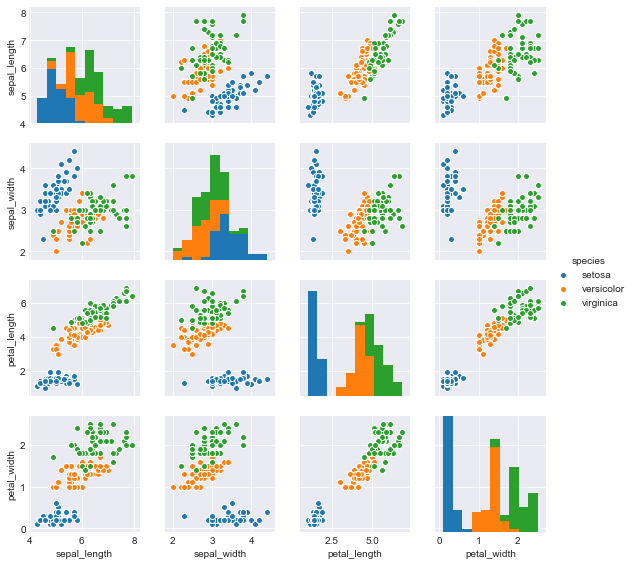

In [18]:
sns.pairplot(iris, hue="species", size=2)

In [19]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species"]

X_mean = X.apply(np.mean, axis=0)
X_std  = X.apply(np.std,  axis=0)
X_norm = (X - X_mean) / X_std
y_label = pd.get_dummies(y)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=16, 
                name="dense_1", 
                input_shape=(4,),
                activation='relu'))

model.add(Dense(units=3, 
                name="output",
                activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [1]:
import os
from keras import backend as K
from lib.default_utils import default_callbacks

K.set_learning_phase(True)  # important if you have modules like dropout in your model

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

logpath, dfcb = default_callbacks(model, prefix='iris', batch_size=32)

# start training, use tensorboard to show overfitting with more iterations
model.fit(x=X_norm, 
          y=y_label, 
          batch_size=32, 
          epochs=1000, 
          verbose=False, 
          callbacks=dfcb, 
          validation_split=0.2,
          shuffle=True)

# save final weights after completion of training
model.save_weights(os.path.join(logpath, "model_weights.h5"))

ModuleNotFoundError: No module named 'keras'

In [22]:
loss, score = model.evaluate(X_norm, y_label)
print("This model has an accuracy of {}".format(score * 100))

150/150 [==============================] - 0s 33us/step
This model has an accuracy of 97.33333349227905


[TensorBoard](http://localhost:9001)